## **<span style="color: orange;">5. Representation Techniques: Word Embeddings </span>**

In [6]:
from functions import install_and_import_packages, preprocess_text, plot_overall_findings, install_and_import_packages

# Call the function to install and import packages
install_and_import_packages()

# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

In [7]:
# After reading the xsl file we find 4 missing values in the column 'Content'
df = pd.read_excel('cleansed_data.xlsx')
df.head()
df.isna().sum()
  

SenderID             0
ReceiverID           0
ActionType           0
NegoOutcome          0
Content              0
length               0
WordCount_basic      0
Content_Length       0
Sentence_Count       0
Word_Count_nltk      0
NegoOutcomeLabel     0
Sentiment            0
SentimentCategory    0
dtype: int64

In [8]:
import pandas as pd

# Count rows with missing values
na_rows = df[df['Content'].isna()]
print(na_rows)

Empty DataFrame
Columns: [SenderID, ReceiverID, ActionType, NegoOutcome, Content, length, WordCount_basic, Content_Length, Sentence_Count, Word_Count_nltk, NegoOutcomeLabel, Sentiment, SentimentCategory]
Index: []


In [9]:
import pandas as pd

# Remove rows with NaN in Content
df = df.dropna(subset=['Content'])

# Remove rows with empty strings or insignificant content in Content
def is_insignificant_content(content):
    return content.strip() == '' or content.strip() == '.' or len(content.split()) == 1

df = df[~df['Content'].apply(is_insignificant_content)]

# Validate Content Length (optional, if Content_Length column is used)
df['Content_Length'] = df['Content'].apply(len)

In [10]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,1635,219,1635,1,219,1,0.226814,Positive
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,1462,197,1462,1,197,1,0.156856,Positive
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,1465,195,1465,1,195,1,0.219167,Positive
3,69,70,Counteroffer,FinalAccept,swift reply read second set proposal discussed...,1104,148,1104,1,148,1,0.139561,Positive
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1153,154,1153,1,154,1,0.055179,Positive


# Preprocess the data before using bag of word

In [11]:
# using function preprocess_text from Model_Comparison.py it removes stopwords and lemmatized and tokenizes the text
from functions import preprocess_text

df = preprocess_text(df, 'Content')

### **<span style="color: orange;">Word Embeddings</span>**
Word embeddings are dense vector representations of words that capture semantic relationships between them. Unlike BoW and TF-IDF, word embeddings consider the context in which words appear. Popular word embedding techniques include:
- **Word2Vec**: Uses neural networks to learn word vectors based on their context in a large corpus.
- **GloVe (Global Vectors for Word Representation)**: Combines the advantages of matrix factorization and context-based learning.

In [12]:
#%pip install scipy==1.12

In [13]:
import nltk
#nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download("word2vec_sample")

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [14]:
#%pip install gensim

In [15]:
import gensim
from nltk.data import find

# load word2vec model and save it in pre_w2v_model
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
pre_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [16]:
len(pre_w2v_model.key_to_index)# index of all the words in the model

43981

In [17]:
len(pre_w2v_model['negotiation'])

300

Print out the first 20 words in the w2v model that have similar weights regarding the negotiation word.

In [18]:
pre_w2v_model.most_similar(positive=["negotiation"], topn=20)

[('negotiations', 0.8168568015098572),
 ('negotiating', 0.7531847357749939),
 ('bargaining', 0.6434566378593445),
 ('negotiate', 0.6341554522514343),
 ('negotiated', 0.6292652487754822),
 ('talks', 0.6133744716644287),
 ('discussions', 0.6095365881919861),
 ('dialogue', 0.5417248606681824),
 ('haggling', 0.5341888070106506),
 ('agreement', 0.501986026763916),
 ('impasse', 0.4880932867527008),
 ('consultations', 0.4769951105117798),
 ('discussion', 0.4654763638973236),
 ('compromise', 0.4547061026096344),
 ('Discussions', 0.4485512673854828),
 ('brinkmanship', 0.44761836528778076),
 ('agreements', 0.4455186426639557),
 ('ratification', 0.4414721131324768),
 ('preconditions', 0.435526579618454),
 ('tripartite', 0.4344906210899353)]

Here the top 10 results regarding the topic negotiation are printed and are not similar to agreement.

In [19]:
pre_w2v_model.most_similar(positive=["negotiation"], negative=["agreement"], topn=10)

[('diplomacy', 0.323906272649765),
 ('dialogue', 0.29187703132629395),
 ('Interviewing', 0.28622379899024963),
 ('politicking', 0.28376883268356323),
 ('tactful', 0.2724672555923462),
 ('debates', 0.2721523642539978),
 ('bargaining', 0.2721068263053894),
 ('negotiations', 0.270591139793396),
 ('circumlocution', 0.2700679302215576),
 ('brinkmanship', 0.2678378224372864)]

In [20]:
print(pre_w2v_model)

KeyedVectors<vector_size=300, 43981 keys>


In [21]:
pre_w2v_model["negotiation"]

array([ 0.00503933,  0.0736899 , -0.0289142 ,  0.0624547 ,  0.0555153 ,
       -0.00116173,  0.0282533 , -0.0617938 ,  0.0565066 ,  0.0799685 ,
       -0.105743  ,  0.0134658 , -0.0305665 ,  0.0114005 , -0.107065  ,
        0.0806294 ,  0.1183    ,  0.00462627,  0.0256097 , -0.0156963 ,
        0.00078481,  0.067081  ,  0.00380015,  0.0852556 ,  0.0328796 ,
        0.0591502 , -0.109709  , -0.073029  ,  0.00805467, -0.044941  ,
        0.00305665, -0.0213139 , -0.0421321 ,  0.0456018 ,  0.0859165 ,
        0.0627852 , -0.00082612,  0.00636113,  0.0684028 , -0.148041  ,
        0.041306  ,  0.0391581 , -0.0366797 ,  0.0156137 , -0.15465   ,
        0.0105743 ,  0.00328383,  0.0137962 , -0.136145  ,  0.0845947 ,
       -0.00850904, -0.00950039, -0.0489063 , -0.035358  , -0.016605  ,
        0.0342014 ,  0.0472541 ,  0.00570023,  0.0614634 ,  0.041306  ,
       -0.142754  ,  0.0555153 , -0.0290794 ,  0.1031    ,  0.0138788 ,
        0.0829425 ,  0.03321   ,  0.0345318 ,  0.027262  , -0.11

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to average word vectors for each document
def get_document_vector(text, model):
    tokens = nltk.word_tokenize(text)
    word_vectors = []
    for word in tokens:
        if word in model:
            word_vectors.append(model[word])
    if len(word_vectors) == 0:  # If no word vectors are found, return a zero vector
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)


In [23]:
# Apply to entire dataset
df['word2vec_embedding'] = df['Content'].apply(lambda x: get_document_vector(x, pre_w2v_model))

# **<span style="color: orange;">XGBoost Model</span>**

In [24]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import xgboost as xgb

In [25]:
# Convert the embeddings into a numpy array
X_xgb = np.array(df['word2vec_embedding'].tolist())
y_xgb = df['NegoOutcomeLabel'].values  # Target variabel

In [26]:
# Split data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.33, random_state=42, stratify=y_xgb)

In [27]:
# Initial XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [28]:
# Predict and evaluate the model
y_pred_test = xgb_model.predict(X_test_xgb)


In [29]:
# Print AUC score
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test_xgb, y_pred_test)))

ROC AUC: 0.5961


low roc score implies that also for this technique the model are not better than random guessing between both classes

In [30]:
# Classification report
print(classification_report(y_test_xgb, y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.27      0.38       239
           1       0.74      0.92      0.82       526

    accuracy                           0.72       765
   macro avg       0.67      0.60      0.60       765
weighted avg       0.70      0.72      0.68       765



Class 0 is being predicted bad, class imbalance high.

In [31]:
# Hyperparameter tuning with GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]

}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_xgb, y_train_xgb)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [32]:
# Use the best parameters
best_params = grid_search.best_params_
best_xgb_model = xgb.XGBClassifier(**best_params, random_state=42,use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [33]:
# Predict and evaluate the optimized model
y_pred_best = best_xgb_model.predict(X_test_xgb)

In [34]:
# Print accurcacy score
print("Accuracy: {:.4f}".format(accuracy_score(y_test_xgb, y_pred_best)))

Accuracy: 0.7320


In [35]:
# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [36]:
# Evaluate the Model
print("XGBoostEvaluation:")
print(f"Training Accuracy: {xgb_model.score(X_train_xgb, y_train_xgb):.4f}")
print(f"Test Accuracy: {xgb_model.score(X_test_xgb, y_test_xgb):.4f}")

XGBoostEvaluation:
Training Accuracy: 0.9994
Test Accuracy: 0.7176


Overfitting extreme even after grid search and tuning. 

In [37]:
# Generate and directly print the classification report
print(classification_report(y_test_xgb, y_pred_best))

              precision    recall  f1-score   support

           0       0.67      0.28      0.40       239
           1       0.74      0.94      0.83       526

    accuracy                           0.73       765
   macro avg       0.71      0.61      0.61       765
weighted avg       0.72      0.73      0.69       765



small increase in class 0 but still incosistend to come to a good prediction outcome

In [39]:
pip install SMOTE

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Define the oversampling method
sm = SMOTE(random_state=42)

# Fit and transform the data
X_train_sm, y_train_sm = sm.fit_resample(X_train_xgb, y_train_xgb)

# Fit the model
best_xgb_model.fit(X_train_sm, y_train_sm)

# Predict and evaluate the model
y_pred_sm = best_xgb_model.predict(X_test_xgb)

# Print the classification report
print(classification_report(y_test_xgb, y_pred_sm))

              precision    recall  f1-score   support

           0       0.59      0.44      0.51       239
           1       0.77      0.86      0.81       526

    accuracy                           0.73       765
   macro avg       0.68      0.65      0.66       765
weighted avg       0.72      0.73      0.72       765



Class 0 increased up to 51% even after using SMOTE so it handles the imbalance a little bit but still not enough meaning the data is usntable.

In [38]:
# Save results to a DataFrame for later comparison
results_xgb = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost (Optimized)'],
    'Accuracy': [accuracy_score(y_test_xgb, y_pred_test), accuracy_score(y_test_xgb, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_xgb, y_pred_test), roc_auc_score(y_test_xgb, y_pred_best)],
    'F1 Score': [f1_score(y_test_xgb, y_pred_test, average='weighted'), f1_score(y_test_xgb, y_pred_best, average='weighted')]
})

# **<span style="color: orange;">Naive Bayes</span>**

In [41]:
# Define features and target
X_nb = np.array(df['word2vec_embedding'].tolist())
y_nb = df['NegoOutcomeLabel'].values  # Target

In [42]:
# Split data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.33, random_state=42, stratify=y_nb)

In [43]:
from sklearn.naive_bayes import GaussianNB
# Initial GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train_nb, y_train_nb)

GaussianNB()

In [44]:
y_pred_test = gnb.predict(X_test_nb)

In [45]:
# Step 5: Evaluate the Model
print("Naive Bayes Model Evaluation:")
print(f"Training Accuracy: {gnb.score(X_train_nb, y_train_nb):.4f}")
print(f"Test Accuracy: {gnb.score(X_test_nb, y_test_nb):.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_test))

Naive Bayes Model Evaluation:
Training Accuracy: 0.5828
Test Accuracy: 0.5817
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.73      0.52       239
           1       0.81      0.51      0.63       526

    accuracy                           0.58       765
   macro avg       0.61      0.62      0.58       765
weighted avg       0.68      0.58      0.59       765



Low accuracy score but better class imbalance.

In [52]:
# Cross-Validation
cv_scores = cross_val_score(gnb, X_train_nb, y_train_nb, cv=100, scoring='accuracy') #30#100
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.625      0.3125     0.5625     0.75       0.6875     0.5
 0.8125     0.5        0.5        0.375      0.6875     0.6875
 0.5625     0.5625     0.4375     0.5625     0.5        0.6875
 0.5625     0.5        0.75       0.625      0.5625     0.5625
 0.4375     0.625      0.6875     0.6875     0.5        0.625
 0.5        0.5625     0.625      0.5        0.6875     0.625
 0.4375     0.3125     0.625      0.5        0.375      0.25
 0.4375     0.5        0.6875     0.1875     0.5625     0.5
 0.5625     0.75       0.5625     0.53333333 0.73333333 0.53333333
 0.66666667 0.6        0.6        0.4        0.46666667 0.66666667
 0.66666667 0.26666667 0.66666667 0.33333333 0.66666667 0.46666667
 0.73333333 0.6        0.6        0.6        0.53333333 0.73333333
 0.33333333 0.46666667 0.6        0.53333333 0.6        0.6
 0.46666667 0.86666667 0.6        0.6        0.73333333 0.6
 0.46666667 0.6        0.4        0.66666667 0.6        0.53333333
 0.6        0.466

CV does not change a lot during the cross validation, results seems stable but still low.

In [53]:
# Hyperparameter Tuning
params = {'var_smoothing': np.logspace(0, -9, num=100)}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=params, scoring='accuracy', cv=50, verbose=1)
grid_search.fit(X_train_nb, y_train_nb)

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


GridSearchCV(cv=50, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [54]:
# Best Parameters and Score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Retrain with Best Parameters
gnb_best = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
gnb_best.fit(X_train_nb, y_train_nb)
y_pred_best = gnb_best.predict(X_test_nb)

Best Hyperparameters: {'var_smoothing': 0.0001232846739442066}
Best CV Score: 0.5654838709677419


In [58]:
# Evaluate the Model
print("Naive Bayes Model Evaluation:")
print(f"Training Accuracy: {gnb_best.score(X_train_nb, y_train_nb):.4f}")
print(f"Test Accuracy: {gnb_best.score(X_test_nb, y_test_nb):.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_best))

Naive Bayes Model Evaluation:
Training Accuracy: 0.5828
Test Accuracy: 0.5817
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.73      0.52       239
           1       0.81      0.51      0.63       526

    accuracy                           0.58       765
   macro avg       0.61      0.62      0.58       765
weighted avg       0.68      0.58      0.59       765



Naive bayes shows better performance for both classes until now and also no overfitting but the accuracy scores are not performing well

In [59]:
# Save results to a DataFrame for later comparison
results_nb = pd.DataFrame({
    'Model': ['Naive Bayes', 'Naive Bayes (Optimized)'],
    'Accuracy': [accuracy_score(y_test_nb, y_pred_test), accuracy_score(y_test_nb, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_nb, y_pred_test), roc_auc_score(y_test_nb, y_pred_best)],
    'F1 Score': [f1_score(y_test_nb, y_pred_test, average='weighted'), f1_score(y_test_nb, y_pred_best, average='weighted')]
})

# **<span style="color: orange;">Random Forest</span>**

In [60]:
# Define features and target
X_rf = np.array(df['word2vec_embedding'].tolist())
y_rf = df['NegoOutcomeLabel'].values  # Target

In [61]:
# Split data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.33, random_state=42, stratify=y_rf)

In [62]:
X_train_rf.shape, X_test_rf.shape

((1551, 300), (765, 300))

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict on test data
y_pred_rf = rf.predict(X_test_rf)

# Evaluate the model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))

Random Forest Classifier
Accuracy: 0.7137254901960784
Confusion Matrix:
 [[ 31 208]
 [ 11 515]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.13      0.22       239
           1       0.71      0.98      0.82       526

    accuracy                           0.71       765
   macro avg       0.73      0.55      0.52       765
weighted avg       0.72      0.71      0.64       765



In [66]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=42, n_estimators=100, n_jobs=-1, verbose=1)
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(X_train_rf, y_train_rf)

# warnings can be ignored

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [67]:
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=42)

In [68]:
rfc_best_pred = rf_best.predict(X_test_rf)

In [69]:
# train and test set accuracy scores for optimized model
print("Random Forest Classifier")
print("Training Accuracy:", rf_best.score(X_train_rf, y_train_rf))
print("Test Accuracy:", rf_best.score(X_test_rf, y_test_rf))


Random Forest Classifier
Training Accuracy: 0.9993552546744036
Test Accuracy: 0.7150326797385621


In [70]:
#print the classification report
print(classification_report(y_test_rf, rfc_best_pred))

              precision    recall  f1-score   support

           0       0.80      0.12      0.20       239
           1       0.71      0.99      0.83       526

    accuracy                           0.72       765
   macro avg       0.76      0.55      0.52       765
weighted avg       0.74      0.72      0.63       765



No huge difference between the optimized and non-optimized models. Class imbalance might be the reason for this.

In [71]:
# Save results to a DataFrame for later comparison
results_rf = pd.DataFrame({
    'Model': ['Random Forest', 'Ramdom Forest (Optimized)'],
    'Accuracy': [accuracy_score(y_test_rf, y_pred_rf),accuracy_score(y_test_rf, rfc_best_pred)],
    'ROC AUC': [roc_auc_score(y_test_rf, y_pred_rf), roc_auc_score(y_test_rf, rfc_best_pred)],
    'F1 Score': [f1_score(y_test_rf, y_pred_rf, average='weighted' ), f1_score(y_test_rf, rfc_best_pred, average='weighted')]
})


# **<span style="color: orange;">Logistic Regression</span>**

In [72]:
import numpy as np
import nltk
from nltk.data import find
import gensim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [73]:
# Define features and target
X_log = np.array(df['word2vec_embedding'].tolist())
y_log = df['NegoOutcomeLabel'].values  # Target

In [74]:
# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.33, random_state=42, stratify=y_log)

In [75]:
# Initialize and train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_log, y_train_log)


LogisticRegression()

In [76]:
# Predict on test set
y_pred_test = logreg.predict(X_test_log)

In [77]:
# Check if there's overfitting or underfitting by comparing the training and test accuracy scores
print(f"Training-set accuracy score: {logreg.score(X_train_log, y_train_log):.4f}")
print(f"Test-set accuracy score: {logreg.score(X_test_log, y_test_log):.4f}")

Training-set accuracy score: 0.6886
Test-set accuracy score: 0.6876


Seems to not overfit at all for the initial logreg model

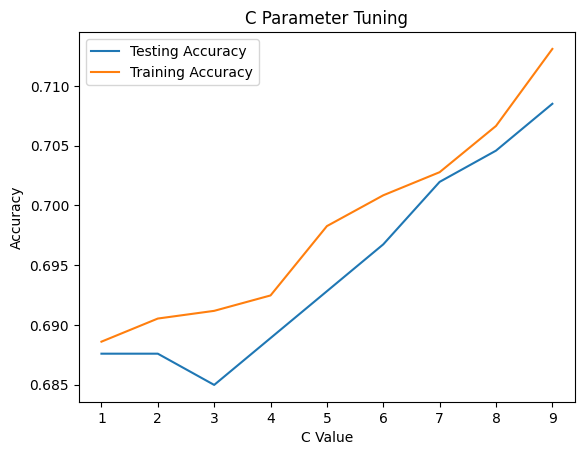

In [78]:
# Tuning the C parameter
section = np.arange(1, 10)
test_accuracy = np.empty(len(section))
train_accuracy = np.empty(len(section))
for i, k in enumerate(section): 
    logreg_tune = LogisticRegression(C=k, solver='liblinear', random_state=42)
    logreg_tune.fit(X_train_log, y_train_log)
    test_accuracy[i] = logreg_tune.score(X_test_log, y_test_log)
    train_accuracy[i] = logreg_tune.score(X_train_log, y_train_log)

# Plot the tuning results
plt.title('C Parameter Tuning')
plt.plot(section, test_accuracy, label='Testing Accuracy')
plt.plot(section, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.show()

Finally some results that look promising. Logistic Regression seems to not overfit since C Parameter tuning shows no big difference between training and test accuracy.

In [83]:
# Logistic Regression with tuned C=10 (chosen from grid search)
logreg_best = LogisticRegression(C=10, solver='liblinear', random_state=42)
logreg_best.fit(X_train_log, y_train_log)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [84]:
# Predict with the best model
y_pred_best = logreg_best.predict(X_test_log)

In [85]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test_log, y_pred_best)
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.5394


Bad ROC score that again implies that class predictions are bad in general and similar to random guessing since it is around 50%.

In [86]:
# Hyperparameter tuning using GridSearchCV
parameters = [{'penalty': ['l1', 'l2']}, {'C': [1, 5, 10, 100, 250, 1000]}]
grid_search = GridSearchCV(estimator=logreg_best, param_grid=parameters, cv=10, scoring='accuracy')
grid_search.fit(X_train_log, y_train_log)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=10, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [1, 5, 10, 100, 250, 1000]}],
             scoring='accuracy')

In [87]:
# Print out the best score and best parameters
print(f"Best GridSearchCV Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")


Best GridSearchCV Score: 0.7279
Best Parameters: {'C': 250}


Best parameters are being selected, Grid search implies C = 250 reahes a score of 73.25%.

In [88]:
# Best Model from GridSearchCV
best_logreg = grid_search.best_estimator_

In [89]:

# Predict with the best model
y_pred_best = best_logreg.predict(X_test_log)

In [90]:
# Evaluate performance for train and test sets optimized model
print(f"Training Accuracy: {best_logreg.score(X_train_log, y_train_log):.4f}")
print(f"Test Accuracy: {best_logreg.score(X_test_log, y_test_log):.4f}")

Training Accuracy: 0.7956
Test Accuracy: 0.7255


Accuray Increases and also seem not to be overfitted

In [91]:
# Classification report
print(classification_report(y_test_log, y_pred_best))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44       239
           1       0.75      0.90      0.82       526

    accuracy                           0.73       765
   macro avg       0.68      0.62      0.63       765
weighted avg       0.71      0.73      0.70       765



Unfortunately class imbalance still present.

In [92]:
# Save results to a DataFrame for later comparison
results_logreg = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (Optimized)'],
    'Accuracy': [accuracy_score(y_test_log, y_pred_test), accuracy_score(y_test_log, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_log, y_pred_test), roc_auc_score(y_test_log, y_pred_best)],
    'F1 Score': [f1_score(y_test_log, y_pred_test, average='weighted'), f1_score(y_test_log, y_pred_best, average='weighted')]
})


# **<span style="color: orange;">Support Vector Machine</span>**

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import pandas as pd

In [94]:
# Define features and target
X_svm = np.array(df['word2vec_embedding'].tolist())
y_svm = df['NegoOutcomeLabel'].values  # Target

In [95]:
# Split data into training and testing sets
X_train_svm , X_test_svm , y_train_svm , y_test_svm  = train_test_split(X_svm , y_svm , test_size=0.33, random_state=42, stratify=y_svm )

In [96]:
# Fit base SVM model
svm = SVC()
svm.fit(X_train_svm , y_train_svm)

SVC()

In [97]:
# Predict with base SVM model
y_pred_svm = svm.predict(X_test_svm)

In [98]:
svm.support_vectors_

array([[ 0.0062288 ,  0.00423362,  0.00112034, ..., -0.0138023 ,
         0.00258606, -0.02015469],
       [ 0.00828322,  0.0090401 , -0.00081269, ..., -0.01303355,
        -0.00300992, -0.0210412 ],
       [ 0.00803642,  0.00048778,  0.00014714, ..., -0.0073747 ,
         0.00193275, -0.02591036],
       ...,
       [ 0.01081955,  0.00742114,  0.01146548, ..., -0.01411544,
        -0.00237952, -0.01388531],
       [ 0.00489941,  0.01523111,  0.00965411, ..., -0.00659009,
         0.00553858, -0.02193595],
       [-0.00233289,  0.01483155,  0.01774142, ..., -0.00661832,
         0.01017314, -0.02436363]])

In [99]:
# Check if model overfits
print("Train set Accuracy: ", svm.score(X_train_svm, y_train_svm))
print("Test set Accuracy: ", svm.score(X_test_svm, y_test_svm))

Train set Accuracy:  0.7079303675048356
Test set Accuracy:  0.6875816993464052


Results seem to not have overfitting issues.

In [101]:
# How good is the ROC based prediction?
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_svm, y_pred_svm)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000


Lowest ROC Score of all models until now.

In [102]:
# What are the best parameters for the model?
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'gamma': [0.1, 0.9], 'kernel': ['rbf', 'linear']})

grid_search.fit(X_train_svm, y_train_svm)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.9],
                         'kernel': ['rbf', 'linear']})

In [103]:
# print out best possible parameters
print('Best parameters:', grid_search.best_params_)

# print out best score
print('Gridsearch CV best score:', grid_search.best_score_)

Best parameters: {'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}
Gridsearch CV best score: 0.7059931542371123


In [104]:
#Modeling with the optimal parameters
best_svm = SVC(kernel='rbf', gamma=0.9, C=10)

#it classifier to training data
best_svm.fit(X_train_svm, y_train_svm)

#make new predictions
y1_pred = best_svm.predict(X_test_svm)

In [105]:
# Print results

print('train accuracy before:', svm.score(X_train_svm, y_train_svm))
print('test accuracy before:', svm.score(X_test_svm, y_test_svm))

print('train accuracy after:', best_svm.score(X_train_svm, y_train_svm))
print('test accuracy after:', best_svm.score(X_test_svm, y_test_svm))

train accuracy before: 0.7079303675048356
test accuracy before: 0.6875816993464052
train accuracy after: 0.7253384912959381
test accuracy after: 0.6954248366013072


No big overfitting good sign regarding this issue but still we hope that class imbalance also can be improved.

In [106]:
# ROC of optimized model in comparison to previous model
ROC_AUC = roc_auc_score(y_test_svm, y_pred_svm)

print('ROC AUC before: {:.4f}'.format(ROC_AUC))

ROC_AUC1 = roc_auc_score(y_test_svm, y1_pred)

print('ROC AUC after: {:.4f}'.format(ROC_AUC1))

ROC AUC before: 0.5000
ROC AUC after: 0.5148


Very small increase in ROC score but still too bad since class imbalance is still present.

In [107]:
from sklearn.model_selection import cross_val_score

C_range = list(range(1, 26))
acc_score = []

# Cross validation with 10 folds
for c in C_range:
    svc = SVC(kernel= 'poly',C=c)
    scores = cross_val_score(svc, X_svm, y_svm, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())   
print(acc_score)

[0.6951578593819974, 0.703806538289297, 0.7111359904463352, 0.7102795193312434, 0.7077026421854008, 0.7059841021047918, 0.6999384236453202, 0.6964770861322586, 0.6973354231974922, 0.6960516494999254, 0.6913046723391552, 0.6865595611285267, 0.6878526645768025, 0.6852645917301089, 0.6826746529332736, 0.6809467831019554, 0.6774929093894613, 0.6749048365427676, 0.6749048365427676, 0.6744719361098671, 0.6727477981788328, 0.6718819973130318, 0.6697193610986714, 0.6684206597999701, 0.6662636214360351]


Text(0, 0.5, 'Cross-Validated Accuracy')

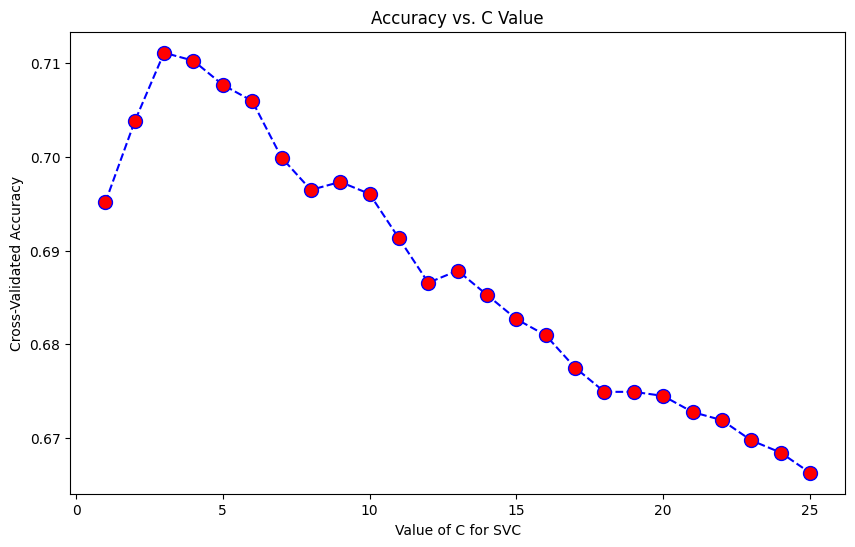

In [108]:
# visualize optimisation iteration
plt.figure(figsize=(10,6))
plt.plot(C_range,acc_score,color = 'blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. C Value')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [109]:
# Compute the cross-val scores for the model with default setting and our optimzed model

#Cross validation for model with default setting
scores = cross_val_score(svm, X= X_train_svm, y = y_train_svm, cv=10, n_jobs=1)
print("Cross-validation scores for default model: {}".format(scores))

#Cross validation for model with optimized setting
scores1 = cross_val_score(best_svm, X= X_train_svm, y = y_train_svm, cv=10, n_jobs=1)
print("Cross-validation scores for optimized model: {}".format(scores1))

Cross-validation scores for default model: [0.69230769 0.69032258 0.68387097 0.69032258 0.69677419 0.69032258
 0.69677419 0.69032258 0.69032258 0.69032258]
Cross-validation scores for optimized model: [0.71794872 0.69032258 0.69677419 0.71612903 0.70322581 0.70322581
 0.69032258 0.69677419 0.69032258 0.70967742]


Model does seem to be stable and consistent since cross validations are not changed a lot even when increasing the "cv" value.

In [110]:
# Print classication report
print(classification_report(y_test_svm, y1_pred))

              precision    recall  f1-score   support

           0       0.80      0.03      0.06       239
           1       0.69      1.00      0.82       526

    accuracy                           0.70       765
   macro avg       0.75      0.51      0.44       765
weighted avg       0.73      0.70      0.58       765



Nevermind class imbalance is still very high maybe apply SMOTE to balance things out.

In [113]:
# balance the classes 0 and 1 with smote to possibly improve the model
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_svm, y_train_svm)

# fit the model
rf_best.fit(X_train_svm, y_train_svm)

# predict and evaluate the model
y_pred_sm = rf_best.predict(X_test_svm)

# print classification report
print(classification_report(y_test_svm, y_pred_sm))


              precision    recall  f1-score   support

           0       0.80      0.12      0.20       239
           1       0.71      0.99      0.83       526

    accuracy                           0.72       765
   macro avg       0.76      0.55      0.52       765
weighted avg       0.74      0.72      0.63       765



Small increase in class "0" but still not enought to predict the outcomes.

In [114]:
# Save results to a DataFrame for later comparison
results_svm = pd.DataFrame({
    'Model': ['SVM', 'SVM (Optimized)'],
    'Accuracy': [accuracy_score(y_test_svm, y_pred_svm), accuracy_score(y_test_svm, y1_pred)],
    'ROC AUC': [roc_auc_score(y_test_svm, y_pred_svm), roc_auc_score(y_test_svm, y1_pred)],
    'F1 Score': [f1_score(y_test_svm, y_pred_svm, average='weighted'), f1_score(y_test_svm, y1_pred, average='weighted')]
})


# **<span style="color: orange;">Model Comparison</span>**

In [115]:
# Concatenate all model results into a single DataFrame
results_combined = pd.concat([results_xgb, results_nb, results_rf, results_svm, results_logreg], ignore_index=True)

In [116]:
results_combined

,Model,Accuracy,ROC AUC,F1 Score
0,XGBoost,0.717647,0.596059,0.679527
1,XGBoost (Optimized),0.732026,0.608799,0.692725
2,Naive Bayes,0.581699,0.622763,0.594941
3,Naive Bayes (Optimized),0.581699,0.622763,0.594941
4,Random Forest,0.713725,0.554397,0.635953
5,Ramdom Forest (Optimized),0.715033,0.551923,0.632092
6,SVM,0.687582,0.500000,0.560291
7,SVM (Optimized),0.695425,0.514835,0.582593
8,Logistic Regression,0.687582,0.500000,0.560291
9,Logistic Regression (Optimized),0.725490,0.623451,0.701094


In [117]:
#pip install plotly

[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


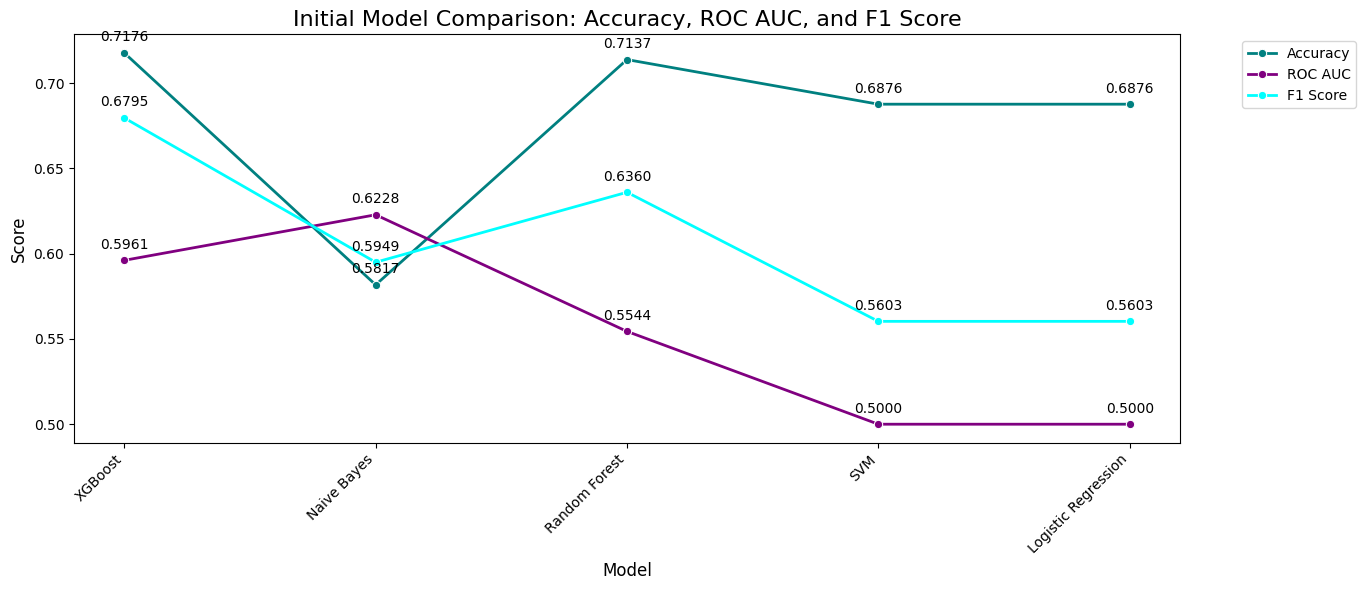

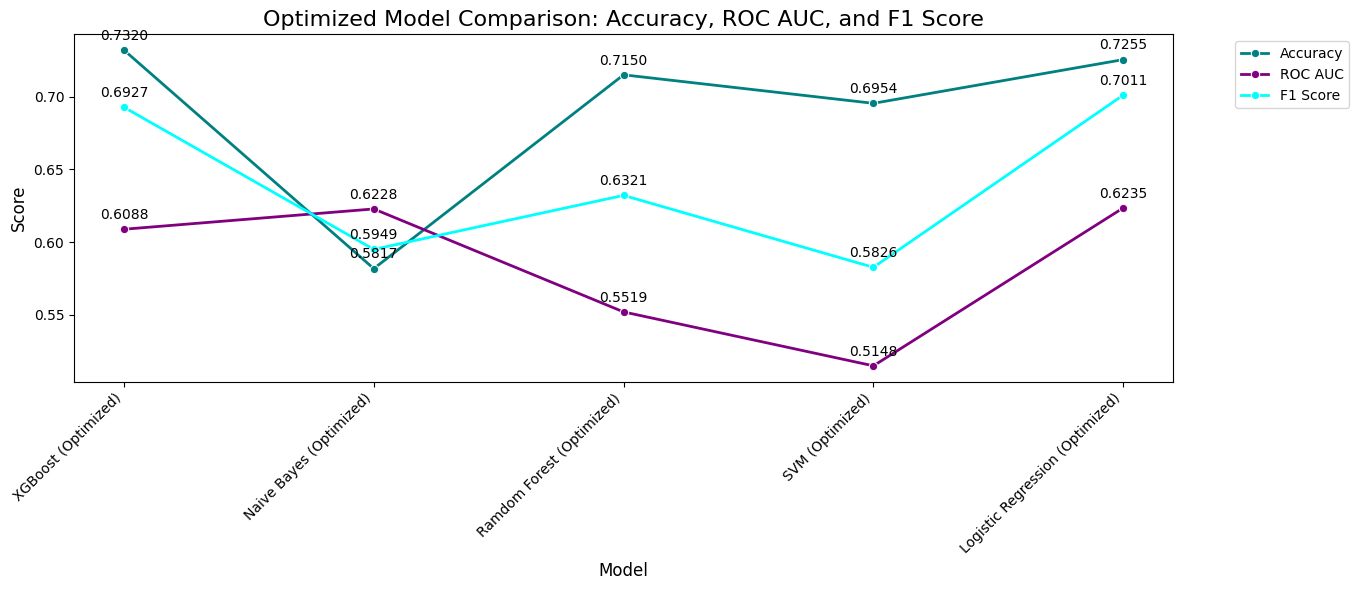

In [120]:
# Import function from Model Comparison.py file
from functions import plot_model_comparison

# Plot the model comparison
plot_model_comparison(results_combined)

Once again, it is notable that Naive Bayes performs poorly compared to others. It is clear that XGBoost and Random Forest consistently remain at the top of the leaderboard, performing well across all different representation techniques. Logistic Regression also shows trends of improvement after optimization. However, a persistent problem with all the predictions is class imbalance and the overfitting of some models. This may be due to the architecture and training methods used. We are curious to see how RNNs will perform, as they might address these issues and improve the results.

In [119]:
import sys

# List all loaded modules
print(sys.modules.keys())

# delete functions module after making changes in the functions.py file to include them, can lead to errors
#del sys.modules['functions']

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'winreg', '_io', 'marshal', 'nt', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', '_winapi', 'ntpath', 'os.path', 'os', '_sitebuiltins', 'encodings.cp1252', '_distutils_hack', 'pywin32_system32', 'pywin32_bootstrap', 'site', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib._abc', 'types', 'importlib.util', 'runpy', 'posixpath', '_operator', 'operator', 'itertools', 'keyword', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'enum', '_sre', 're._constants', 're._parser', 're._casefix', 're._compiler', 'copyreg', 're', 'fnmatch', 'errno', 'urllib', 'math', 'ipaddress', 'urllib.parse', 'pathlib', 'collections.abc', 'contextlib', '_typing', 